# Capstone Proposal

## The project's domain background 
    
    — the field of research where the project is derived

Robotics is the application of AI that most excites me. Autonomous vehicles is one of the most direct applications of AI in robotics, and this intersection between development of real products and cutting edge research is one of the reasons I am passionate about my job in this field.

Day to day I spend most of my time on perception, mostly at the microwave wavelength at which radar sees the world. While this world hits both of my twin passions of physics and robotics, it is unfortunately hard to share, as sensor data is largely proprietary, and cannot be shared with publically. 

Instead, I would like to tackle the other end of the autonomy problem, that of planning and control. To acheive this end, I plan to build upon the skills developed in the reinforcement learning section on the nanodegree for continous robotic control, specifically a DDPG agent (suited to continous control), while utilizing OpenAI's gym framework to solve a variety of control problems. 

Finally, to keep the focus on something related to autonomous vehicles, once we have proven that an agent can learn simplier control tasks in "classic control", it will be unleashed on the the car racing simulation in the Box2D section of OpenAI's gym. 

* https://gym.openai.com/envs/CarRacing-v0/

    
## A problem statement
    
    — a problem being investigated for which a solution will be defined

How well can agents generalize between different tasks? 

Specifically, how well does the DDPG agent generalize to a variety of other control tasks? What changes to reward function and agent are necessary, if any, to use the same agent to solve these tasks? Depending on the enviroment, what modifications to the agent are beneficial to solving a selection OpenAI's control environments. 

Can we train an agent on other control tasks, then transfer some of this learning to a car racing environments? If possible, this will show the usefulness of the "transfer learning" approach often used in reinforcement leaning. At least, if not the weights and the input and output layers which are linked to the state and actions of the environment, can the general network architecture be shared?

If so, it allows us to train an agent in a simple, perhaps fast simulation, for many episodes, before training on a more complicated task.

At a minimum, the agent will be tested on the mountain car and cartpole simulations, before moving on to the car racing simulation.

Below are some references with OpenAI problems solved by actor-critic networks similar to the DDPG that will be attempted.

* [1] Actor-Critic Models with Keras and OpenAI: https://towardsdatascience.com/reinforcement-learning-w-keras-openai-actor-critic-models-f084612cfd69
* [2] CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING TimothyP.Lillicrap, JonathanJ.Hunt, AlexanderPritzel, NicolasHeess, TomErez, YuvalTassa, DavidSilver&DaanWierstra
* [3] SoftActor-Critic: Off-Policy Maximum Entropy Deep Reinforcement Learning with a Stochastic Actor. TuomasHaarnoja, Aurick Zhou, Pieter Abbeel, Sergey Levine

   
## The datasets and inputs

    — data or inputs being used for the problem
    
Since this is reinforcement learning, the data is the interaction with the enviroment itself. In this case the data and inputs will come from OpenAI's Gym enviroments.

* https://gym.openai.com/envs/CartPole-v1/
* https://gym.openai.com/envs/MountainCarContinuous-v0/
* https://gym.openai.com/envs/CarRacing-v0/

For the final task of car racing, the state space is as follows:  

* State consists of 96x96 pixels
* Reward is -0.1 every frame and +1000/N for every track tile visited, where N is the total number of tiles in track. For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points.  
* Car also can go outside of PLAYFIELD, that is far off the track, then it will get -100 and die. 

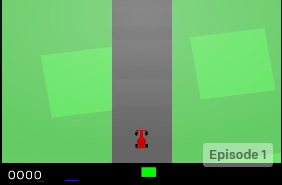

    
## A solution statement

    — a the solution proposed for the problem given

A solution will be defined based on the OpenAI car racing simulation.

* The episode finishes when all tiles representing a section of track are visited
* CarRacing-v0 defines "solving" as getting average reward of 900 over 100 consecutive trials.

The best agent will be able to traverse the track as quickly as possible, i.e. in the least number of frames, which will translate into the highest reward based on the default reward function provided by OpenAI.

   
## A benchmark model

    — some simple or historical model or result to compare the defined solution to;
    
Reinforcement learning is one of the least understood parts of artificial intellience. Due to the open nature of the problems tackled, with ill-defined "success" and "failure", when compared to the ground truth labels of supervised learning, it is often hard to benchmark reinforcement learning. 

### Benchmark I (initial goal)

A simple Q-learning agent, one not as well suited to the task on continuous control as DDPG, will serve as an initial benchmark agent.

### Benchmark II (stretch goal)

OpenAI has created a "gym", a framework with a set of "standard" environments and problem scopes, in which different agents can be rated against. 

I will use this to score the performance on my agent.

https://github.com/openai/gym/wiki/Leaderboard    

From here, the current leading is a submission from AMD using a Double Deep Q Network with Dropout "A Double Deep Q-Network (DDQN) [2] was trained using a modified version of the DeepMind Atari2600 architecture[1], a form of curriculum learning[3], and dropout for regularization[4]".

* https://github.com/AMD-RIPS/RL-2018
* https://drive.google.com/file/d/1DQU4yCsq6nbVJB6WKoXlED9YFGDselIu/view


    
## A set of evaluation metrics 

    — functional representations for how the solution can be measured;
    
The agents and reward functions will be evaluated based on three criteria
1. How well the agent does the task: the percentage of the goal acheived.
2. How quickly the agent learns the task: the number of many episodes to get to the goal.
3. How well does the agent learn: the average reward per episode, and a rolling average (say 100 episodes) reward per episode to better evaluate if the gradient of the learning is overall increasing.

    
## An outline of the project design 
 
    — how the solution will be developed and results obtained.

The project will be broken down into sections, each covering a different OpenAI environment.

For each environment, the DDPG agent will be used to solve the enviroment, with the results evaluated against the evaluation metrics, and compared with the results of the leaderboard on OpenAI.

The mountain car, and cartpole will serve as a starting point for test enviroments.

For the DDPG agent, the following initial architecture will be used.
* actor: 4 dense layers (64, 128, 128, 64) with dropout (this seems to help overfitting), relu for dense layers with sigmoid for activation layer to handle the continous action space
* actor: 4 dense layers (64, 128, 128, 32) with dropout (this seems to help overfitting), all relu
* Since the input space is pixels, CNN layers usage will also be evaluated (like the Atari game agents).
* optimizers (actor and critic): adam with learning rate of 0.0001, amsgrad = true (amsgrad: https://keras.io/optimizers/, https://openreview.net/forum?id=ryQu7f-RZ)
* OU Noise on the action space
* Memory Replay buffer to better learn from past episodes through random sampling
* simulated annealing of action space noise to help with the agent getting stuck
* L2 regularization on layers (was recommended in project review, but did not get a chance to try this on the quadcopter project and would like to experiment, https://keras.io/regularizers/)

---

# Capstone Project Report

## Abstract / TLDR



Compare DDPG with Dropout against DQN with Dropout





## 1. Background


### Open AI


### Q Learning 


### Deep Q Learning


### Deep Deterministic Policy Gradients



## 2. Building an Open-AI Reinforcement Learning Framework

One of the goals of this project was to evaluate agent performance across different OpenAI enviroments. This was to see how well agents could generalize, as opposed to requiring re-tuning and re-architecting for every environment. In order to do this, the first challenge was decide on a software architecture for training reinforcement learning agents with OpenAI Gym. 

There are many different versions of training code available for different environments and agents. Udacity provides several, and there are countless on online blogs and github repositories. Without a common design framework it is hard to combine these different resources into something that can be used for this project. Most of the source code found online seemed overly complex, brittle, hard to debug, and hard to modify.

With in mind, the following modules were developed to abstract away the reinforcement learning training process, and make it as general as possible for different agents and enviroments:

* Main: primary script. Manages agent and environment selection, examine enviroment, trigger interaction between the environment and the agent for training and testing, and plot results.
* Enviroment: In this case, OpenAI gym. The state and action sizes will be derived from here.
* Agent: The agent to train and test. The agent will need to have the ability to perform in both test and train mode. The agent will require the following functionality: act, learn, step, and reset (these are often blended together in other implementations, making switching agents and environments difficult, and modifying agents without breaking them troublesome).
* Interact: over a series of episodes, engage the agent with the enviroment in discrete time steps, in either training or test mode, compute the training time, plot actions and rewards selectively, and write the results to file.

### 2.1 Main Flowchat

1. Select enviroment (and optionally examine it)
2. Select agent (must be environment compatiable)
3. Interact environment and agent in training mode
4. Plot training results
5. Interact environment and agent in test mode
6. Plot test results
7. Close environment


In [1]:
import gym

"""
# Create an environment and set random seed
"""
selectedEnvironment = 6
env = 0
envName = 0

# Toy Text - Discrete state and action space
if selectedEnvironment == 0:
    envName = 'Taxi-v2'

# Classic Control - Continuous State and Discrete Action Spaces
elif selectedEnvironment == 1: 
    envName = 'MountainCar-v0' # needs Discretized or better
elif selectedEnvironment == 2: 
    envName = 'Acrobot-v1'     # needs Discretized, Tile Encoding or better
elif selectedEnvironment == 3: 
    envName = 'CartPole-v1'    # needs Deep Q Learning to do well?

# Box 2D - Continuous State, Discrete Actions
elif selectedEnvironment == 4: 
    envName = 'LunarLander-v2' # discrete actions, continuous state

# Classic Control - Continuous State and Action Spaces
elif selectedEnvironment == 5: 
    envName = 'Pendulum-v0' # continuous only
elif selectedEnvironment == 6: 
    envName = 'MountainCarContinuous-v0' # continuous only

# Box 2D - Continuous State and Action Spaces
elif selectedEnvironment == 7:
    envName = 'LunarLanderContinuous-v2' # continuous only
elif selectedEnvironment == 8: 
    envName = 'BipedalWalker-v2'  # continuous only

# Box 2D - Image State and Continuous Action Spaces   
elif selectedEnvironment == 9: 
    envName = 'CarRacing-v0'      #  image input, actions [steer, gas, brake]

# Initialize the environment
env = gym.make(envName)
env.reset()

ModuleNotFoundError: No module named 'gym'

In [ ]:
# Basic inspection of the environment
def examine_environment(env):

    # Run a random agent
    score = 0
    for t in range(250):
        action = env.action_space.sample()
        env.render()
        state, reward, done, _ = env.step(action)
        score += reward
        if done:
            break 
    print('Final score:', score)
    env.close()
    
    # Explore state (observation) space
    print("State space:", env.observation_space)
    print("- low:", env.observation_space.low)
    print("- high:", env.observation_space.high)
    
    # Generate some samples from the state space 
    print("State space samples:")
    print(np.array([env.observation_space.sample() for i in range(10)]))
    
    # Explore the action space
    print("Action space:", env.action_space)
    
    # Generate some samples from the action space
    print("Action space samples:")
    print(np.array([env.action_space.sample() for i in range(10)]))


### 2.2 Interact Flowchat

1. Initialize: setup writer, start time, best reward
2. Process episodes: agent acts, enviroment steps, agent learns (if in learn mode), agent steps 
3. Monitor: print and plot select results (rewards, actions per step) to monitor progress

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt 
import csv
import time
import datetime

from visuals import plot_scores

def interact(agent, env, num_episodes=20000, mode='train', file_output="results.txt"):
    """Run agent in given reinforcement learning environment and return scores."""
    
    # Save simulation results to a CSV file.
    labels = ['episode', 'timestep', 'reward']

    # Run the simulation, and save the results.
    with open(file_output, 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(labels)
        
        scores = []
        best_reward = -np.inf # keep track of the best reward across episodes
        all_start_time = time.time()
    
        for i_episode in range(1, num_episodes+1):
            # Initialize episode
            state = env.reset()        # reset environment        
            agent.reset_episode(state) # reset agent      
            episode_steps = 0 # Reset for the new episode
            episode_total_reward = 0   # total rewards per episode
            done = False
            actionList = []
            start_time = time.time()

            # Interact with the Environment in steps until done
            while not done:
                # 1. agent action given environment state
                #    assumes explore/exploit as part of agent design
                # 2. enviroment changes based on action
                # 3. (training mode) learn from environment feedback 
                #    (new state, reward, done) to agent
                # 4. step the agent (forward with the new state)
                              
                action = agent.act(state, mode)
                state, reward, done, info = env.step(action)
                
                if mode == 'train':
                    agent.learn(action, reward, state, done)
                
                agent.step(state)
    
                # render event 25 steps
                if(episode_steps % 25 == 0) and mode != 'train':
                    env.render()
                    print("\tstep: ", episode_steps, ", action:", action)
    
                # gather episode results until the end of the episode
                episode_total_reward += reward
                episode_steps += 1                
                actionList.append(action)
                
                # Save results of timestep of each episode to csv file
                to_write = [i_episode] + [episode_steps] + [reward]
                writer.writerow(to_write)

            """
            Episode Done - Plot Results and Update best episode/reward
            """
    
            # Save final score of the episode
            scores.append(episode_total_reward)
            
            # plot scores each 50 episodes
            if(i_episode % 25 == 0):
                plt.figure(1)
                _ = plot_scores(scores)

            # plot episode actions for analysis
            if(i_episode % 10 == 0 and mode == 'train'):
                plt.figure(2)
                if(episode_steps > 400): #[0:500]
                    plt.plot(actionList[0:400])
                    plt.title("actions over steps")
                    plt.show()
                    plt.figure(3)
                    plt.plot(actionList[400:len(actionList)])
                    plt.title("actions over steps")
                    plt.show()
                else:             
                    plt.plot(actionList)
                    plt.title("actions over steps")
                    plt.show()
            elif mode != 'train': 
                plt.plot(actionList)
                plt.title("actions over steps")
                plt.show()                
            
            # Print episode stats
            if mode == 'train':
                  
                if episode_total_reward > best_reward:
                    best_reward = episode_total_reward 
                    best_episode = i_episode
                
                print("\rEpisode = {:4d} (duration of {} steps); Reward = {:7.3f} (best = {:7.3f}, in epi {})   ".format(
                    i_episode, episode_steps, episode_total_reward, best_reward, best_episode), end="")  # [debug]               

                # show the compute time to train the episode
                elapsed_time = time.time() - start_time
                print("\n\tEpisode training time: ", elapsed_time)    
                
                sys.stdout.flush()

        # show the compute time to train for all episodes
        all_elapsed_time = time.time() - all_start_time
        print("\n******************************")    
        print("\n*** All episodes training time (HH:MM:SS): ", str(datetime.timedelta(seconds=all_elapsed_time)))    
        print("\tAverage training time per episode: ", all_elapsed_time/num_episodes)    
        print("******************************")   

In [ ]:
def plot_score_from_file(file_to_read):
    # Load simulation results from the .csv file
    results = pd.read_csv(file_to_read)
    
    # Total rewards for each episode
    episode_rewards_sum = results.groupby(['episode'])[['reward']].sum()
    smoothed_sum = episode_rewards_sum.rolling(25).mean() 
       
    # plot the sum rewards
    plt.figure(4)
    plt.plot(episode_rewards_sum, label='sum rewards')
    plt.plot(smoothed_sum, label='running mean')
    plt.legend()
    axes = plt.gca()
    axes.set_ylim([-250,250])
    plt.show()  

### 2.3 Handling Different Enviroment Types

The following environment types are available in OpenAI:

1. discrete states and actions. 
2. discrete actions, continuous states. 
3. continuous states continuous actions. 
4. Image pixel states, continuous actions. 

Therefore, in order to examine different agent performance across different environments, we need to ensure compatiability across these types, or at least make agents interchangable so that certain agents could be used for certain types of enviroment state and action spaces. 

For example, being a discrete state space, the Taxi-v2 environment does not have the observation space low field, making it not fully compatiable with the examine_environment written from continuous state spaces and discrete/continuous action spaces.

#### Explore or Exploit

This decision was made part of the agent act class method to generalize across agents and enviroments, so each agent is responsible for their exploration policy as part of the agent design.

In [ ]:
# 1. discrete states and actions

import gym

# Initialize the enviroment
env = gym.make('Taxi-v2') # continuous only
env.reset()

# Examine the environment
from visuals import examine_environment
examine_environment(env)


In [ ]:
# 2. discrete actions, continuous states.  

# Initialize the enviroment
env = gym.make('MountainCar-v0')
env.seed(505);
env.reset()

# Examine the environment
from visuals import examine_environment
examine_environment(env)

In [ ]:
# 3. continuous states continuous actions. 

# Initialize the enviroment
env = gym.make('MountainCarContinuous-v0') # continuous only
env.seed(505);
env.reset()

# Examine the environment
from visuals import examine_environment
examine_environment(env)

In [ ]:
# 4. Image pixel states, continuous actions. 

# Initialize the enviroment
env = gym.make('CarRacing-v0') # continuous only
env.reset()

# Examine the environment
from visuals import examine_environment
examine_environment(env)

## 3. Agents Summary

### 3.1 Simple Q Learning Agent (Benchmark Agent)

The baseline agent for this project is modelled after the Q-Learning agent with state discretization provided by Udacity in a practice project. Small modifications have been made where necessary in order to align with the training architecture for this project.

A Q learning agent learns by comparing the expected reward with the actual reward. This approach mirrors that found in cognitive neuroscience on how learning works in biological systems [15].

This agent is designed to handle continuous state (with the agent discretizes), and discrete action spaces in OpenAI Gym, such as the discrete versions of Lunar Lander, Mountain Car, Acrobat, and Cartpole.

### 3.2 Deep Q Network (Benchmark Agent)

This agent is similar to the simple Q learning agent, except that instead of a Q learning table a deep neural network is used.

When running on the same mountain climber enviroment, the Deep Q Network was able to demonstrate superior results to the Q table based approach, solving in less episodes. Still, since it was a DNN with many parameters, training each episode took longer.

### 3.3 DDPG (Primary Agent)

Reinforcement Learning agent using Deep Deterministic Policy Gradients. 

This is an actor(policy)-critic(value) method, where the policy function used is deterministic, with noise added to produce the desired stochasticity in actions taken.

This agent will be the focus o

Original Paper:
Lillicrap, Timothy P., et al., 2015. Continuous Control with Deep 
Reinforcement Learning, https://arxiv.org/pdf/1509.02971.pdf


## 4. Mountain Climber

In order to compare different networks for initial experimentation, the Mountain Climber environment was chosen. This enviroment is relatively simple, with only a single action. The action is either discretized into -1 and +1, or continuous, which will allow continuous action and discretized action agents to be compared on the same environment. 

Because it is a relatively simple search space to solve (single action), it will serve a training ground for experiments of agent parameters and architectures without requiring too many episodes to solve.

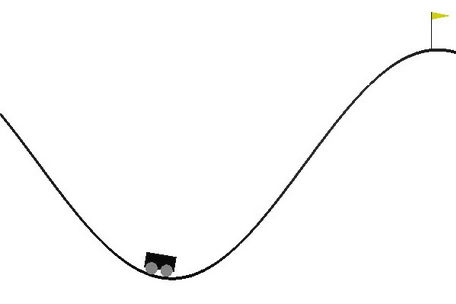

### 3.1 Simple Q Learning Agent

The results of experiments on mountain climber for Q Learning Agent are below.

In [ ]:
# First, let's take a look at the basic and tiled state discretization

from visuals import examine_environment_MountainCar_discretized, examine_environment_Acrobat_tiled

env = gym.make('MountainCar-v0')
env.seed(505);
env.reset()
examine_environment_MountainCar_discretized(env)

env = gym.make('Acrobot-v1')
env.seed(505);
env.reset()
examine_environment_Acrobat_tiled(env, 20)

Results show both discretized and disretized with tiling agents able to solve mountain climber, though the tiled approach seems to have a smoother and more stable reward profile.

In [ ]:
from visuals import plot_score_from_file

# Plot Results from 50,000 Episodes, Basic Discretization 
print("Basic Discretization")
dir = "results/MtClimber/discretized/"
plot_score_from_file(dir + "20190622223639MountainCar-v0_train.txt")


# Plot Results from 50,000 Episodes, Tiled Discretization 
print("Tiled Discretization")
dir = "results/MtClimber/tiled/"
plot_score_from_file(dir + "20190623105243MountainCar-v0_train.txt")

### 3.2 Deep Q Network



### 3.3 DDPG



#### 3.3.1 Network Architecture




##### Activation Function

" In contrast to ReLUs, ELUs have negativevalues which allows them to push mean unit activations closer to zero like batchnormalization but with lower computational complexity" [5]

ELU activation functions have gathered a lot of attention in supervised learning, with the promise of speed and better results both. A known solvable network of mountain climber using RELU activation function was changed to use ELU.

The network normally solves this environment between 50 an 100 episodes. However, with ELU, the network was unable to solve even after 250 episodes.


ELU Test 1


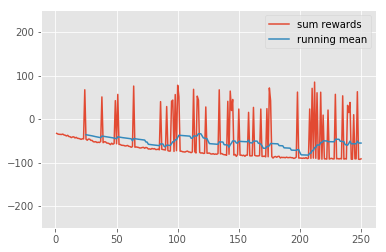

ELU Test 2


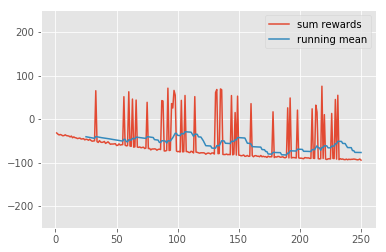

In [6]:
from visuals import plot_score_from_file

print("ELU Test 1")
dir = "results/MtClimberContinuous/elu/"
plot_score_from_file(dir + "20190622214124MountainCarContinuous-v0_train.txt")

print("ELU Test 2")
dir = "results/MtClimberContinuous/elu/"
plot_score_from_file(dir + "20190622214130MountainCarContinuous-v0_train.txt")

##### Initializers

Both Xavier and Variance scaling kernel initializers were attempted. Neither of these seemed to have a beneficial effect on learning. Therefore the random uniform initialize in Keras was maintained (https://keras.io/initializers/).

Xavier Initializer


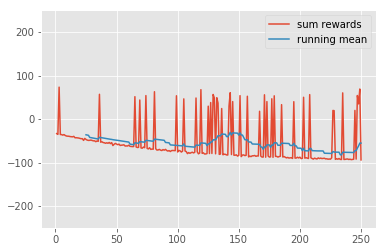

In [7]:
from visuals import plot_score_from_file

print("Xavier Initializer")
dir = "results/MtClimberContinuous/xavier/"
plot_score_from_file(dir + "20190622235529MountainCarContinuous-v0_train.txt")

##### Number of Layers and Layer Size



#### Dropout 

Dropout is a long used regularization technique in DNNs [7]. It is especially common in supervised learning, but also has been used occassionally in reinforcement learning [14] .

Small levels of dropout such as 0.1 seem to neither help nor hurt learning, though performance decays after 0.3, and dropout larger than 0.5 seemed to make learning much more difficult. Dropout of 0.1 and 0.2 did seem to stabilize the learning, and make the network less vulnerable to catastophic forgetting once it had succeeded at its task.

Network size when using dropout should also be considered, though was not adjusted for here.

"If n is the number of hidden units in any layer and p is the probability of retaining a unit,then instead of n hidden units, only pn units will be present after dropout, in expectation. Moreover, this set of pn units will be different each time and the units are not allowed to build co-adaptations freely.  Therefore, if an n-sized layer is optimal for a standard neuralnet on any given task, a good dropout net should have at least n/p units." [6]

The following settings were used:


Dropout 0.0


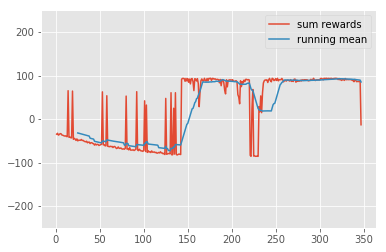

Dropout 0.2 (note QuadcoperBig network instead of Quadcopter Max)


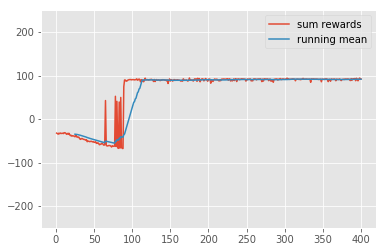

Dropout 0.3


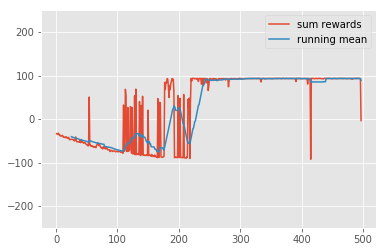

Dropout 0.5


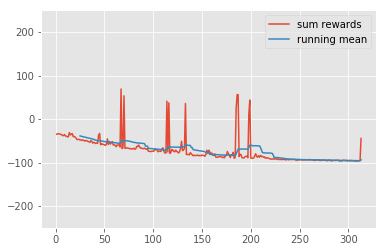

Dropout 0.7


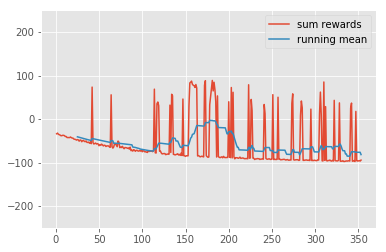

In [8]:
from visuals import plot_score_from_file

print("Dropout 0.0")
dir = "results/MtClimberContinuous/dropout/0.0/"
plot_score_from_file(dir + "20190622145327MountainCarContinuous-v0_train.txt")

print("Dropout 0.2 (note QuadcoperBig network instead of Quadcopter Max)")
dir = "results/MtClimberContinuous/dropout/0.2/"
plot_score_from_file(dir + "20190623181645MountainCarContinuous-v0_train.txt")

print("Dropout 0.3")
dir = "results/MtClimberContinuous/dropout/0.3/"
plot_score_from_file(dir + "20190622145438MountainCarContinuous-v0_train.txt")

print("Dropout 0.5")
dir = "results/MtClimberContinuous/dropout/0.5/"
plot_score_from_file(dir + "20190622170332MountainCarContinuous-v0_train.txt")

print("Dropout 0.7")
dir = "results/MtClimberContinuous/dropout/0.7/"
plot_score_from_file(dir + "20190622165506MountainCarContinuous-v0_train.txt")

#### Regularizers

Regularizers are another common technique in superised learning. The application of L2 regularization however did not appear to have any benefit in reinforcement learning, and seemed to make it difficult for the agent to converge to the optimal policy. L2 levels of 0, 0.01, and 0.001 were applied to each layer of the actor and critic networks.

L2 0.0


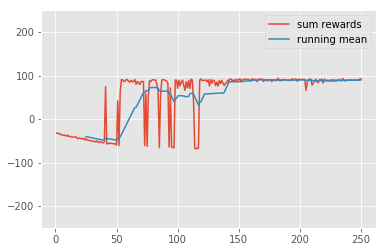

L2 0.001


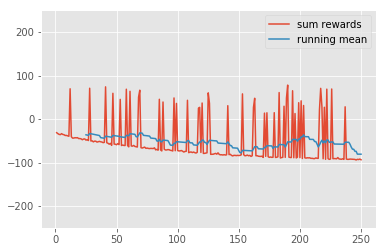

L2 0.010


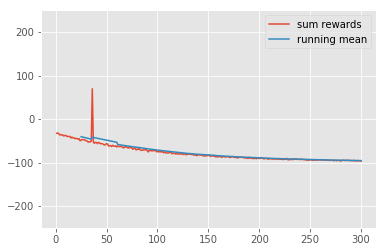

In [5]:
from visuals import plot_score_from_file

print("L2 0.0")
dir = "results/MtClimberContinuous/l2norm/0.000/"
plot_score_from_file(dir + "20190623105751MountainCarContinuous-v0_train.txt")

print("L2 0.001")
dir = "results/MtClimberContinuous/l2norm/0.001/"
plot_score_from_file(dir + "20190623074245MountainCarContinuous-v0_train.txt")

print("L2 0.010")
dir = "results/MtClimberContinuous/l2norm/0.010/"
plot_score_from_file(dir + "20190623113955MountainCarContinuous-v0_train.txt")

#### Optimizer

For the DDPG agent the Adam optimiser was used. This network is widely used, and hence was not experimented with widely, since there were already too many parameters and architectural decisions to make ([1], [16], [17]).

#### Learning Rate

The learning rate is one of the most fundamental and difficult parts to get right in any network. For mountain climber environment, a learning rate of 0.0001 seems to produce reasonable results. 

Learning Rate 0.001


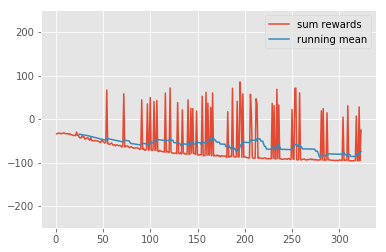

Learning Rate 0.0001 (from dropout testing)


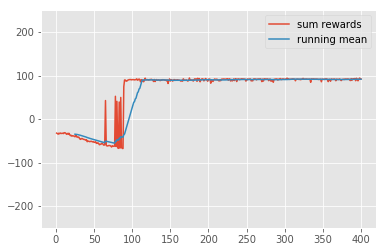

Learning Rate 0.00001


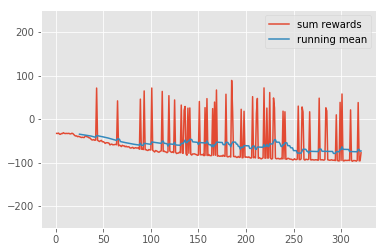

In [12]:
from visuals import plot_score_from_file

print("Learning Rate 0.001")
dir = "results/MtClimberContinuous/learningrate/0.001/"
plot_score_from_file(dir + "20190623190455MountainCarContinuous-v0_train.txt")

print("Learning Rate 0.0001 (from dropout testing)")
dir = "results/MtClimberContinuous/dropout/0.2/"
plot_score_from_file(dir + "20190623181645MountainCarContinuous-v0_train.txt")

print("Learning Rate 0.00001")
dir = "results/MtClimberContinuous/learningrate/0.00001/"
plot_score_from_file(dir + "20190623190506MountainCarContinuous-v0_train.txt")

#### Action Repeat



#### Exploration Policy

Using expodentially decaying noise with a pure explore or exploit policy, resulted in more consistant and easier to tune results across agent hyper-parameter settings and environments than OU noise. 

Comparing explore rates using an expodentially decaying policy.

#### Random Replay Memory 

The idea with random replay is to de-couple the actions from the learning, and is widely used in both DQN and DDPG. Instead of learning from the current state, prior state, and action, which tend to be highly correlated from one step to the next, the agent instead learns randomly from memory. This allows the agent to learn multiple times from the same experience in a reasonably de-correlelated way, and makes the agent less likely to get stuck in poor behavior patterns based on its recent state and action. 

* Batch Size: How many samples from the replay buffer to use. Common values are 32, 64, 128, and 256 samples [1].
* Buffer Size: Typically values for this are in the range of 100,000 or 1,000,000 steps [1]. Most initial experiments were conducted with a buffer size of 100,000. Later this was increased to 1,000,000 to add more robustness against complicated enviroments.

#### Learning Frequency

The idea here was to use larger batches, but less often, as a trade-off to avoid loading and unloading the GPU all the time. Instead of learning each step, the DDPG agent will use a 10x larger batch size, but learn 10x less frequently. While this does not reduce the number of episodes needed to train the agent, it does speed up the overall time needed to train the agent over all episodes.

Unfortunately this approach did not seem to really help the learning process, and was hence abandoned.

#### Soft Update


#### Summary 

What was learned about architecture and parameters based on these experiments?

### Comparing Q-Table, Q-Network, and DDPG

The Q table, Q Network, have the relatively simpler task of solving an environment where the action space has been discretized into two values, -1 and 1. The DDPG agent is challenged with solving the more challenging continuous action space between -1 and 1.



## 4. Lunar Lander

### 4.1 Simple Q Learning Agent

### 4.2 Q Network

### 4.3 DDPG


## 5. Bipedal Walker

Continuous Action Spaces Only

### 5.1 DDPG



## 6. Racing Car




## Conclusions

Training of reinforcement learning agents is often unstable. The same agent with the same hyperparameters can vary wildly between training runs. This may be down to nothing more than the initial network weights and the random luck of agent selection during exploration. It is hard to tell.

Compute speed is important. ELU speeds up by about 40%. For my i7-2600, a single experiment used about 20% of all cores, so around 3 experiments could run without too much slowdown, especially since the GPU 1080ti and has more than enough memory to handle the data sizes of the reinforcement learning environments and their batch sizes. This is something that would have been very helpful to figure out early on, instead of later.

Building a RL pipeline for different agents and environments was a challenge

Converting agents to handle different environment types was non-trival.

Stabilizing the training was difficult. Big variations in training performance between episodes and also for a series of episodes, since small changes in agent networks or hyperparameters often leading to divergence in the training, with the agent stuck repeating some undesirable action for all-time, or simply forgetting how to complete a task it could do before (often called "catastrophic forgetting" for obvious reasons). 

Batch normalization significantly reduced the variation in reward between training episodes, and made the actions explored by the agent seem more continuous and less random. However, batch normalization not seem to speed up the training process, or seem to help the agent actually converge on the correct behavior. The in apposed to the paper by [], where batch normalization is claimed to help training times and accuracy.

Big batch sizes seem to overtrain the agent, making too large actions changes at once. It seems like that batch size should be related to the learning rate and other learning parameters, like tau and gamma in the DDPG agent. Large batch sizes seems to make the agent overshoot local minimum, and makes sense why many papers use a relatively small batch size of 16, 32, or 64.


Even with more complicated enviroments, the DDPG agent was able to outperform the Q learning agent. We can compare results from the discrete vs. continuous mountain climber, as an example. 


## Future Work 




## References

* [1] CONTINUOUS  CONTROL  WITH  DEEP  REINFORCEMENTLEARNING - DDPG - https://arxiv.org/pdf/1509.02971.pdf

* [2] Batch Normalization: Accelerating Deep Network Training byReducing Internal Covariate Shift - https://arxiv.org/pdf/1502.03167.pdf
* [3] Implementing Batch Normalation with Keras - https://www.dlology.com/blog/one-simple-trick-to-train-keras-model-faster-with-batch-normalization/

* [4] Taming the Noise inReinforcement Learning via Soft Updates - http://www.auai.org/uai2016/proceedings/papers/219.pdf

* [5] FAST AND ACCURATE DEEP NETWORK LEARNING BY EXPONENTIAL LINEAR UNITS(ELUS) - https://arxiv.org/pdf/1511.07289.pdf
* [6] ELU as a Neural Networks Activation Function - https://sefiks.com/2018/01/02/elu-as-a-neural-networks-activation-function/

* [7] Dropout:  A Simple Way to Prevent Neural Networks fromOverfitting - http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf

* [8] ON THE CONVERGENCE OF ADAM AND BEYOND - https://openreview.net/pdf?id=ryQu7f-RZ
* [9] Adam: A Method for Stochastic Optimization - https://arxiv.org/abs/1412.6980v8

* [10] Finding Good Learning Rate and The One Cycle Policy - https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6

* [11] The False Promise of Off-Policy Reinforcement Learning Algorithms - https://towardsdatascience.com/the-false-promise-of-off-policy-reinforcement-learning-algorithms-c56db1b4c79a

* [12] An Overview of Regularization Techniques in Deep Learning - https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/

* [13] cifar10_cnn practice project from Udacity - Fork: https://github.com/smmuzza/machine-learning/blob/master/projects/practice_projects/cnn/cifar10-classification/cifar10_cnn.ipynb
* [14] DDQN with Dropout: CarRacing-v0 - https://github.com/AMD-RIPS/RL-2018/blob/master/documents/leaderboard/IPAM-AMD-Car_Racing.ipynb

* [15] "The Learning Brain" Great Courses by Prof. Thad A. Polk

* [16] Playing Atari with Deep Reinforcement Learning - https://arxiv.org/pdf/1312.5602v1.pdf
* [17] Rainbow: Combining Improvements in Deep Reinforcement Learning - https://arxiv.org/pdf/1710.02298.pdf
* [18] Deep Reinforcement Learning with Double Q-learning - https://arxiv.org/pdf/1509.06461.pdf
* [19] Addressing Function Approximation Error in Actor-Critic Methods - https://arxiv.org/abs/1802.09477
* [20] Deep Q Networks for Atari Games - https://github.com/danielegrattarola/deep-q-atari